In [2]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
municipality_df = pd.read_csv('../assessment_8/data/municipality_df.csv')
gdp_df = pd.read_csv('../assessment_8/data/gdp_df.csv')

In [4]:
miami = municipality_df[municipality_df['Municipality'] == 'Miami-Fort Lauderdale-West Palm Beach, FL Metro Area']
miami.shape

(63, 8)

In [4]:
fig = px.bar(miami, y='Amount_of_Firms', x='Firm_Sale_Amount')
fig.update_layout(
    xaxis_title="Firm Sale Amount",
    yaxis_title="Amount of Firms"
)
fig.update_layout(title="Firm Sale's vs Total Firms in Miami")
fig.show()

In [5]:
grouped_gender= miami.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_gender

Ethnicity
Equally Hispanic/non-Hispanic      235.666667
Hispanic                          5325.333333
Non-Hispanic                     12749.777778
Name: Amount_of_Firms, dtype: float64

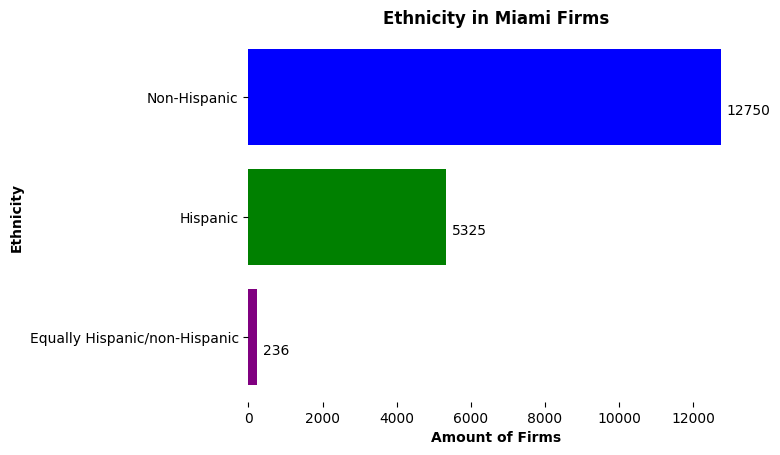

In [6]:
data = {
    'Ethnicity': ['Equally Hispanic/non-Hispanic', 'Hispanic', 'Non-Hispanic'],
    'Amount_of_Firms': [236, 5325, 12750],
}

df = pd.DataFrame(data)
fig, ax = plt.subplots()
bars = ax.barh(df['Ethnicity'], df['Amount_of_Firms'], color=['purple', 'green', 'blue'])
for i, v in enumerate(df['Amount_of_Firms']):
    ax.text(v + 159, i - 0.15, str(v), color='black')
ax.set_xlabel('Amount of Firms', fontweight = 'bold')
ax.set_ylabel('Ethnicity', fontweight='bold')
ax.set_title('Ethnicity in Miami Firms', fontweight='bold')
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

In [7]:
pd.options.display.max_rows = 999
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         21 non-null     object 
 1   Tampa_GDP    21 non-null     float64
 2   Miami_GDP    21 non-null     float64
 3   Orlando_GDP  21 non-null     float64
dtypes: float64(3), object(1)
memory usage: 804.0+ bytes


In [77]:
miami_gdp = gdp_df[gdp_df['DATE'] == '2018-01-01']
miami_gdp

,DATE,Tampa_GDP,Miami_GDP,Orlando_GDP
17,2018-01-01,141091.139,319777.839,158969.547


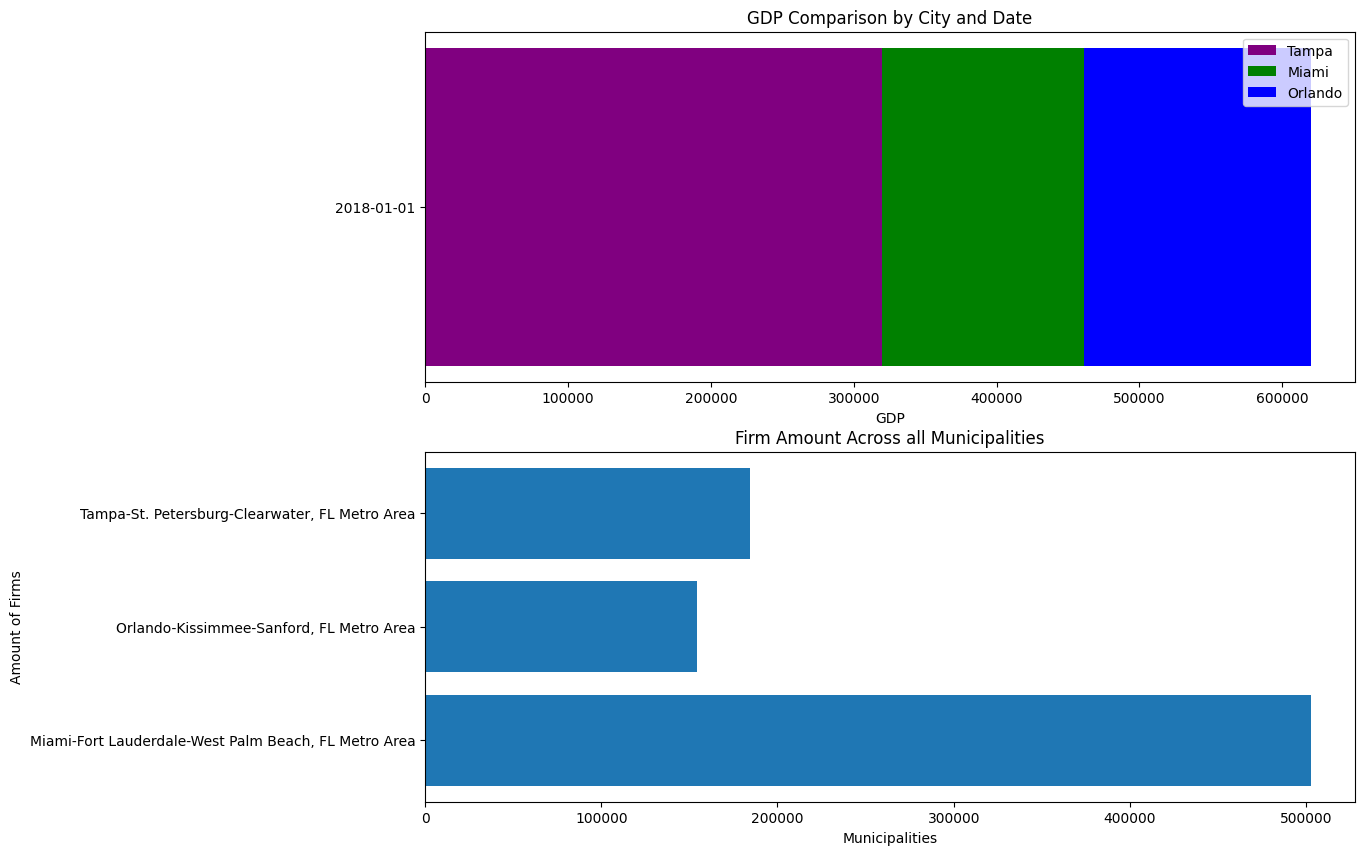

In [119]:


# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# plot the first chart in the first subplot
y = miami_gdp['DATE']
x1 = miami_gdp['Miami_GDP']
x2 = miami_gdp['Tampa_GDP']
x3 = miami_gdp['Orlando_GDP']
ax1.barh(y, x1, height=0.05, color='purple', align='center')
ax1.barh(y, x2, height=0.05, color='green', align='center', left=x1)
ax1.barh(y, x3, height=0.05, color='blue', align='center', left=x1+x2)
ax1.set_xlabel('GDP')
ax1.set_ylabel('')
ax1.set_title('GDP Comparison by City and Date')
ax1.legend(['Tampa', 'Miami', 'Orlando'])

ax2.barh(city_sales['Municipality'], city_sales['Amount_of_Firms'])
ax2.set_title('Firm Amount Across all Municipalities')
ax2.set_xlabel('Municipalities')
ax2.set_ylabel('Amount of Firms')
plt.show()


In [84]:
city_sales = municipality_df.groupby('Municipality')['Amount_of_Firms'].sum().reset_index()

city_sales


,Municipality,Amount_of_Firms
0,"Miami-Fort Lauderdale-West Palm Beach, FL Metr...",502602
1,"Orlando-Kissimmee-Sanford, FL Metro Area",154525
2,"Tampa-St. Petersburg-Clearwater, FL Metro Area",184546


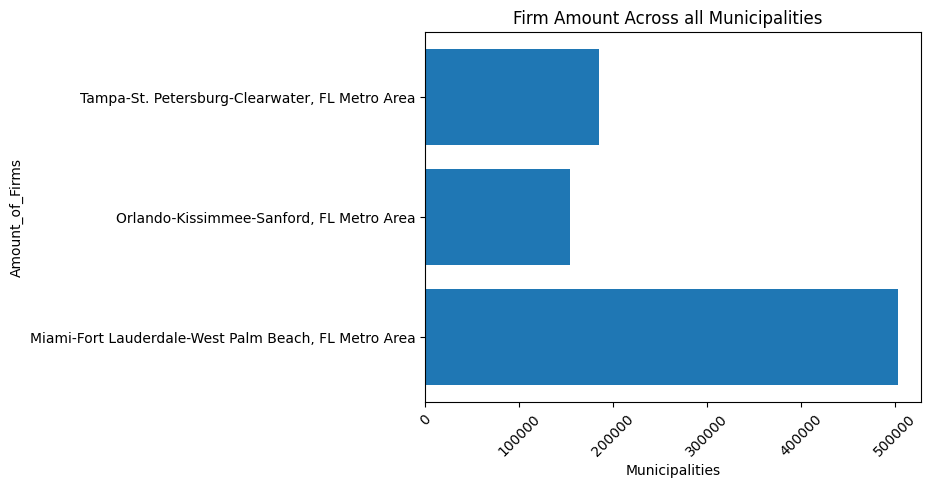

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.barh(city_sales['Municipality'], city_sales['Amount_of_Firms'])

ax.set_title('Firm Amount Across all Municipalities  ')
ax.set_xlabel('Municipalities')
ax.set_ylabel('Amount_of Firms')
plt.xticks(rotation=45)
plt.show()


In [ ]:
municipality_df

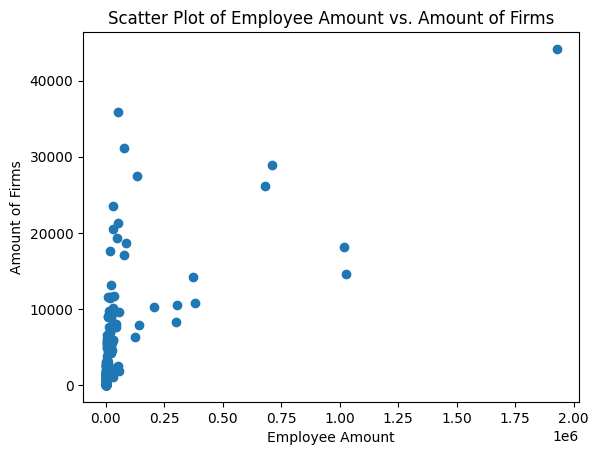

In [132]:
plt.scatter(municipality_df['Employee_Amount'], municipality_df['Amount_of_Firms'])
plt.xlabel('Employee Amount')
plt.ylabel('Amount of Firms')
plt.title('Scatter Plot of Employee Amount vs. Amount of Firms')
plt.show()


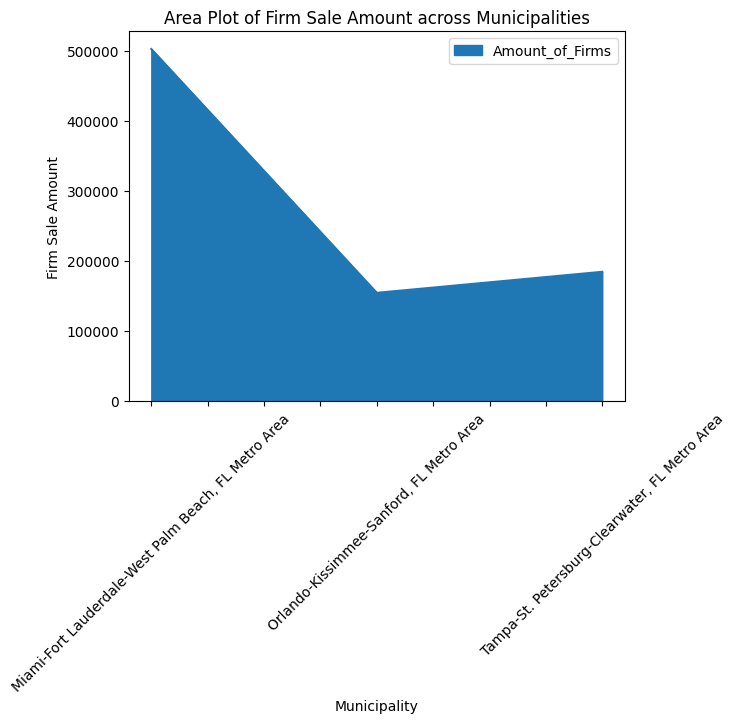

In [126]:
data = city_sales.set_index('Municipality')
data.plot(kind='area')
plt.xlabel('Municipality')
plt.ylabel('Firm Sale Amount')
plt.title('Area Plot of Firm Sale Amount across Municipalities')
plt.xticks(rotation=45)

plt.show()


In [7]:
correl_matrix = municipality_df[['Employee_Amount', 'Amount_of_Firms']]
correl_matrix

,Employee_Amount,Amount_of_Firms
0,2152,1233
1,527,1115
2,10489,4375
3,10405,8950
4,18500,17632
...,...,...
184,6633,5813
185,21501,11554
186,29670,10073
187,45859,8022


In [16]:
# import pandas
import pandas as pd

# obtaining the data
data = {'Female': [1268, 4366, 1440],
		'Male': [3513, 11239, 4232],
		'Equal M and F': [869, 2835, 980],
        'Equal Hispanic and Non-Hispanic': [21, 630, 6038],
		'Hispanic': [0, 645, 4815],
		'Non-Hispaic': [21, 630, 6038],
		}


# creation of DataFrame
df = pd.DataFrame(correl_matrix)

# creation of correlation matrix
corrM = df.corr()

corrM


,Employee_Amount,Amount_of_Firms
Employee_Amount,1.000000,0.614902
Amount_of_Firms,0.614902,1.000000


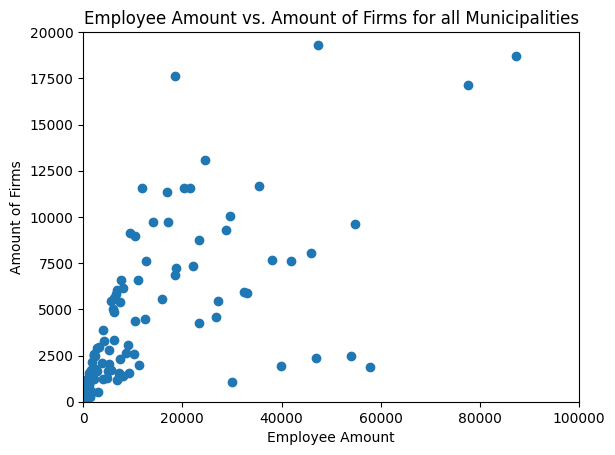

,Employee_Amount,Amount_of_Firms
Employee_Amount,1.000000,0.614902
Amount_of_Firms,0.614902,1.000000


In [42]:
plt.scatter(correl_matrix['Employee_Amount'], correl_matrix['Amount_of_Firms'])
plt.xlabel('Employee Amount')
plt.ylabel('Amount of Firms')
plt.title('Employee Amount vs. Amount of Firms for all Municipalities')
plt.xlim(0, 100000)
plt.ylim(0, 20000) 
# outliers to show
# as employee goes higher, does not mean there are more firms
# plt.xlim(0, 1000000)
# plt.ylim(0, 100000) 
plt.show()

df = pd.DataFrame(correl_matrix)
corrM = df.corr()
print
corrM